# OOP

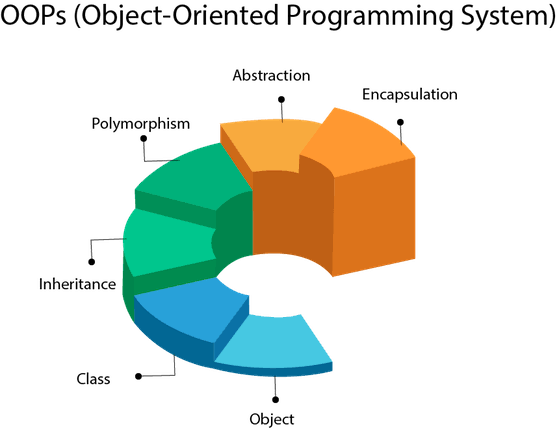

A class in Python serves as a blueprint or template for creating objects. It consists of instance variables, which are like attributes, and related methods that define the behavior of the objects.

On the other hand, an object is a specific instance of a class, possessing a unique set of properties defined by the class. The great thing is that you can create multiple objects based on the same class, each with its own distinct characteristics.

In [ ]:
class Electronic:
    def __init__(self, name, brand, price, quantity):
        self.name = name
        self.brand = brand
        self.price = price
        self.quantity = quantity

The __init__ special method, also known as a Constructor, is used to initialize the Book class with attributes such as name, brand, price and quantity.

In [ ]:
electronic1 = Electronic("Laptop", "Dell", 1200, 5)
electronic2 = Electronic("Smartphone", "Samsung", 800, 10)
electronic3 = Electronic("Headphones", "Sony", 150, 20)

print(electronic1)
print(electronic2)
print(electronic3)

In Python, when objects are printed, the default output shows the class and memory location, lacking specific details like the name or brand. To address this, we can use a special method named __repr__.

Special methods in Python are functions denoted by names starting and ending with double underscores ( __ ). They are automatically invoked under specific conditions, enabling us to customize object behavior.

By implementing the __repr__ method within a class, we can control how the object is represented as a string when it is printed or when the repr() function is called. This empowers us to display particular information about the object's attributes and qualities in a more meaningful manner.

In [ ]:
class Electronic:
    def __init__(self, name, brand, price, quantity):
        self.name = name
        self.brand = brand
        self.price = price
        self.quantity = quantity

    def __repr__(self):
        return f"Electronic(name='{self.name}', brand='{self.brand}', price={self.price}, quantity={self.quantity})"

# Instantiate an example of Electronic
electronic1 = Electronic("Laptop", "Dell", 1200, 5)

# Print the object, now using the __repr__ method
print(electronic1)

Electronic(name='Laptop', brand='Dell', price=1200, quantity=5)


## Encapsulation

Encapsulation is a concept in programming that protects certain properties of an object, ensuring that they can only be accessed and modified through designated class/object methods.

Private attributes are properties that are not directly accessible from outside the class, and they are hidden from external manipulation. To achieve this, we declare private attributes by adding two underscores before their names.

In our Electronic class, we will employ encapsulation by introducing a private attribute named __discount

In [ ]:
class Electronic:
    def __init__(self, name, brand, price, quantity):
        self.name = name
        self.brand = brand
        self.price = price
        self.quantity = quantity
        self.__discount = 0.10

    def __repr__(self):
        return f"Electronic(name='{self.name}', brand='{self.brand}', price={self.price}, quantity={self.quantity})"

# Instantiate an example of Electronic
electronic1 = Electronic("Laptop", "Dell", 1200, 5)

print(electronic1.name)
print(electronic1.brand)
print(electronic1.price)
print(electronic1.quantity)
# print(electronic1.__discount)

Laptop
Dell
1200
5


You can see that all the attributes are printed except the private attribute __discount. We use getter and setter methods to access private attributes.

Let’s make the price property, private, and use a setter method to assign the discount attribute and a getter function to get the price attribute.

In [ ]:
class Electronic:
    def __init__(self, name, brand, price, quantity):
        self.name = name
        self.brand = brand
        self.__price = price
        self.quantity = quantity
        self.__discount = None

    def set_discount(self, discount):
        self.__discount = discount

    def get_price(self):
        if self.__discount:
            return self.__price * (1-self.__discount)
        return self.__price

    def __repr__(self):
        return f"Electronic(name='{self.name}', brand='{self.brand}', price={self.get_price()}, quantity={self.quantity})"

Now let’s create two objects, one for the purchase of a single electronic and another for the purchase of an electronic in bulk quantity. While purchasing electronics in bulk quantity, we want to give a discount of 20%, so we’ll use the set_discount() method to set the discount to 20% in that case.

In [ ]:
# Instantiate an examples of Electronics
one_laptop = Electronic("Laptop", "Dell", 1200, 1)

multi_laptops = Electronic("Laptop", "Acer", 1500, 10)
multi_laptops.set_discount(0.20)

print(one_laptop.get_price())
print(multi_laptops.get_price())
print(one_laptop)
print(multi_laptops)

1200
1200.0
Electronic(name='Laptop', brand='Dell', price=1200, quantity=1)
Electronic(name='Laptop', brand='Acer', price=1200.0, quantity=10)


## Inheritance

In object-oriented programming, inheritance is considered one of the most crucial features. It allows a class to acquire methods and attributes from another class, facilitating code reuse and promoting a hierarchical structure.

In the context of our Electronic shop software, we will introduce two new classes: Laptop and Phone. These classes represent different types of electronics, but they may share common attributes such as name and brand, as well as common methods like get_price() and set_discount(). Repeating the same code for each new class is inefficient and redundant in terms of time, effort, and memory utilization.

By utilizing inheritance, we can create a parent class that holds the common attributes and methods, and then have the Laptop and Phone classes inherit from this parent class. This way, we can avoid duplicating code and efficiently manage the shared functionality across various book types. The child classes will automatically gain access to the properties and behavior of the parent class, promoting code organization and reducing maintenance overhead.

In [ ]:
class Electronic:
    def __init__(self, name, brand, price, quantity):
        self.name = name
        self.brand = brand
        self.__price = price
        self.quantity = quantity
        self.__discount = None

    def set_discount(self, discount):
        self.__discount = discount

    def get_price(self):
        if self.__discount:
            return self.__price * (1-self.__discount)
        return self.__price

    def __repr__(self):
        return f"Electronic, name:'{self.name}', brand:'{self.brand}', price:{self.get_price()}, quantity:{self.quantity}"

class Laptop(Electronic):
    def __init__(self, name, brand, price, quantity, processor):
        super().__init__(name, brand, price, quantity)
        self.processor = processor

class Phone(Electronic):
    def __init__(self, name, brand, price, quantity, display_size):
        super().__init__(name, brand, price, quantity)
        self.display_size = display_size

By using the super() function in the subclass constructors, we correctly call the parent class's __init__ method, allowing us to initialize the common attributes defined in the Electronic class.

In [ ]:
laptop1 = Laptop('XPS 15', 'Dell', 1800, 25, 'Intel Core i7')
laptop1.set_discount(0.15)

phone1 = Phone('Galaxy S20', 'Samsung', 800, 215, '6.2 inches')
phone1.set_discount(0.22)

print(laptop1)
print(phone1)

Electronic, name:'XPS 15', brand:'Dell', price:1530.0, quantity:25
Electronic, name:'Galaxy S20', brand:'Samsung', price:624.0, quantity:215


There are four common types of inheritance. In single inheritance, a class inherits from just one parent class, allowing it to access the parent’s properties and behavior. Multilevel inheritance involves classes forming a chain where each class derives from its immediate parent, passing down attributes and methods. Hierarchical inheritance features multiple classes inheriting from a single parent class, each adding its own attributes. In multiple inheritance, a class can inherit from multiple parent classes, gaining combined attributes and methods.

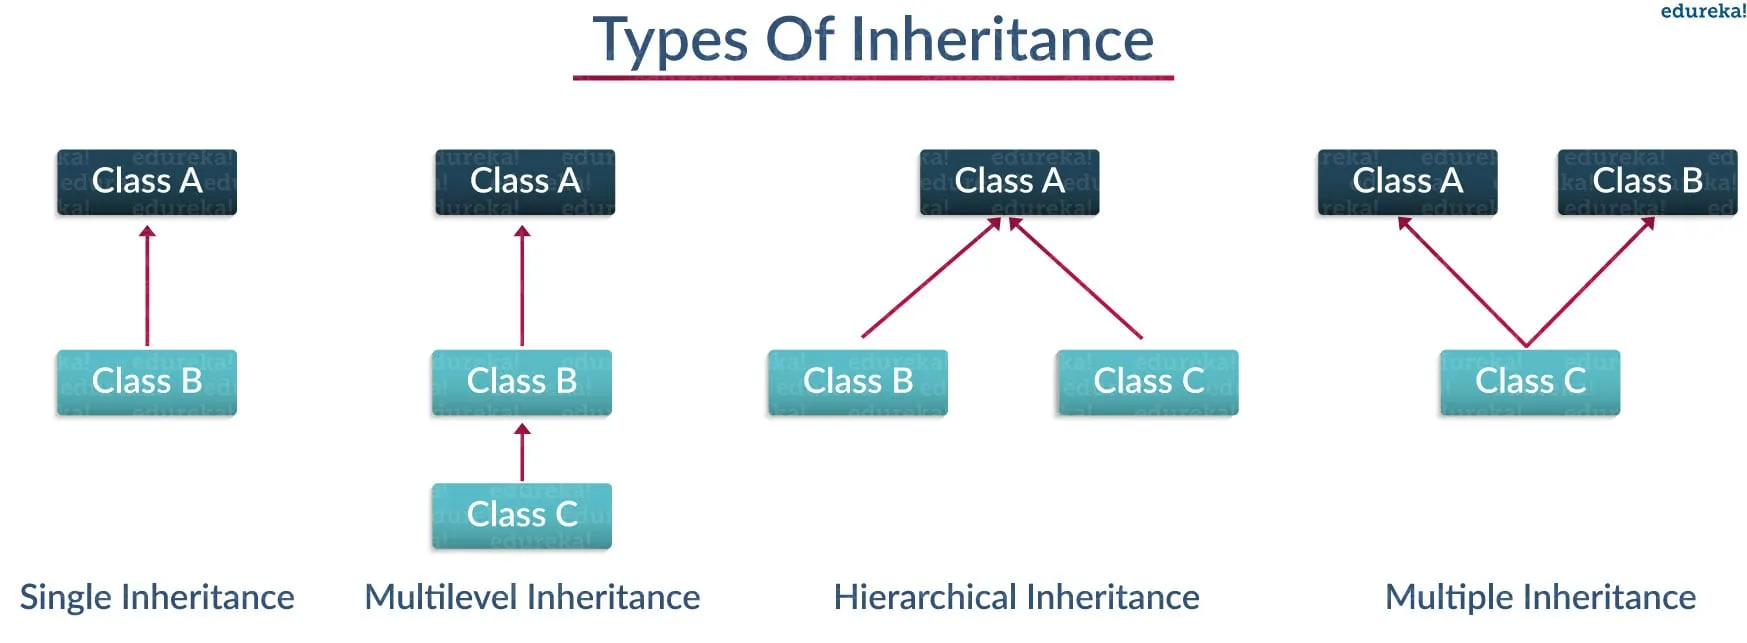

## Polymorphism

In programming, polymorphism pertains to the capability of a subclass to alter an existing method inherited from its superclass to suit its specific requirements. In essence, a subclass can either utilize a method from its superclass as it is or adjust it according to its needs. This flexibility allows for dynamic and versatile behavior in different instances of related classes, enhancing code reusability and adaptability.

In [ ]:
class Electronic:
    def __init__(self, name, brand, price, quantity):
        self.name = name
        self.brand = brand
        self.__price = price
        self.quantity = quantity
        self.__discount = None

    def set_discount(self, discount):
        self.__discount = discount

    def get_price(self):
        if self.__discount:
            return self.__price * (1-self.__discount)
        return self.__price

    def __repr__(self):
        return f"Electronic, name:'{self.name}', brand:'{self.brand}', price:{self.get_price()}, quantity:{self.quantity}"

class Laptop(Electronic):
    def __init__(self, name, brand, price, quantity, processor):
        super().__init__(name, brand, price, quantity)
        self.processor = processor

class Phone(Electronic):
    def __init__(self, name, brand, price, quantity, display_size):
        super().__init__(name, brand, price, quantity)
        self.display_size = display_size

    def __repr__(self):
        return f"Phone, name:'{self.name}', brand:'{self.brand}', price:{self.get_price()}, display_size:{self.display_size}"

The superclass, “Electronic,” possesses a distinct method called __repr__. This method can be used by the "Laptop" subclass, effectively causing it to execute whenever an object is printed.

Contrastingly, the “Phone” subclass is equipped with its individual __repr__ special function, as seen in the provided example code. The "Phone" subclass leverages polymorphism to invoke its unique method, effectively overriding the corresponding method inherited from its superclass.

In [ ]:
# Instantiate a Phone object
phone1 = Phone("Smartphone", "Samsung", 1000, 2, 6.2)

# Instantiate a Laptop object
laptop1 = Laptop("Notebook", "HP", 800, 3, "Intel i5")

# Print the objects, invoking their respective __repr__ methods
print(phone1)
print(laptop1)

Phone, name:'Smartphone', brand:'Samsung', price:1000, display_size:6.2
Electronic, name:'Notebook', brand:'HP', price:800, quantity:3


## Abstraction

Abstraction in object-oriented programming simplifies things by focusing on the main aspects of classes or objects, hiding the nitty-gritty details. It makes using objects easier without needing to know all the complicated inner workings.

In Python, direct abstraction isn’t provided, but using magic methods enables abstraction. When an abstract method is defined in a superclass, subclasses inheriting from it must implement their versions of the method. Although a subclass won’t directly use the superclass’s abstract method, this abstraction enforces a consistent structure across all subclasses, contributing to better code organization and maintenance.

In our parent class Electronic, we have defined the __repr__ method. Let's make that method abstract, forcing every subclass to compulsorily have its own __repr__ method.

In [ ]:
from abc import ABC, abstractmethod


class Electronic(ABC):
    def __init__(self, name, brand, price, quantity):
        self.name = name
        self.brand = brand
        self.__price = price
        self.quantity = quantity
        self.__discount = None

    def set_discount(self, discount):
        self.__discount = discount

    def get_price(self):
        if self.__discount:
            return self.__price * (1-self.__discount)
        return self.__price

    @abstractmethod
    def __repr__(self):
        return f"Electronic, name:'{self.name}', brand:'{self.brand}', price:{self.get_price()}, quantity:{self.quantity}"

class Laptop(Electronic):
    def __init__(self, name, brand, price, quantity, processor):
        super().__init__(name, brand, price, quantity)
        self.processor = processor

class Phone(Electronic):
    def __init__(self, name, brand, price, quantity, display_size):
        super().__init__(name, brand, price, quantity)
        self.display_size = display_size

    def __repr__(self):
        return f"Phone, name:'{self.name}', brand:'{self.brand}', price:{self.get_price()}, display_size:{self.display_size}"

# Instantiate a Laptop object
laptop1 = Laptop("Notebook", "HP", 800, 3, "Intel i5")

# Instantiate a Phone object
phone1 = Phone("Smartphone", "Samsung", 1000, 2, 6.2)

# Print the objects
print(phone1)

print(laptop1)

TypeError: Can't instantiate abstract class Laptop with abstract method __repr__

In the above code, we have inherited the ABC module to create the Electronic Abstract class. We’ve made the __repr__ method an abstract method by adding the @abstractmethod decorator.

In the Laptop class, we’ve intentionally missed the implementation of the __repr__ method to see what will happen.

We get a TypeError saying we cannot instantiate an object of the Laptop class. Let’s add the implementation of the __repr__ method and see what happens now.

In [ ]:
class Laptop(Electronic):
    def __init__(self, name, brand, price, quantity, processor):
        super().__init__(name, brand, price, quantity)
        self.processor = processor

    def __repr__(self):
        return f"Laptop, name:'{self.name}', brand:'{self.brand}', price:{self.get_price()}, processor:{self.processor}"

By creating an abstract base class Electronic and then extending it with concrete subclasses like Laptop and Phone, we've showcased how abstraction allows us to define a common structure while enabling customization and specialization in the subclasses.

## Method

### Overloading

Method overloading, a prevalent concept in object-oriented programming languages, involves employing multiple methods with the same name but differing numbers of arguments within a single class. This enables more flexibility in designing classes that can perform similar actions with distinct parameter combinations.

In Python, unlike some other languages, method overloading based on different argument counts is not directly supported. However, you can achieve similar functionality using default arguments or variable-length argument lists. Here are both approaches:

### Using Default Arguments:

In [ ]:
class MathOperations:
    def add(self, a=0, b=0, c=0):
        return a + b + c

# Create an instance
math_obj = MathOperations()

# Call the method with different argument counts
print(math_obj.add())         # Output: 0
print(math_obj.add(1))        # Output: 1
print(math_obj.add(1, 2))     # Output: 3
print(math_obj.add(1, 2, 3))  # Output: 6

0
1
3
6


### Using Variable-Length Argument Lists (args):

In [ ]:
class MathOperations:
    def add(self, *args):
        total = sum(args)
        return total

# Create an instance
math_obj = MathOperations()

# Call the method with different argument counts
print(math_obj.add())         # Output: 0
print(math_obj.add(1))        # Output: 1
print(math_obj.add(1, 2))     # Output: 3
print(math_obj.add(1, 2, 3))  # Output: 6

0
1
3
6


While Python doesn’t have traditional method overloading like some languages, using default arguments or variable-length argument lists allows you to achieve similar results, adapting a method to handle different argument scenarios.

### Overriding

When a method with identical name and arguments exists in both a derived (child) class and its base (parent) class, the method in the derived class is said to “override” the method from the base class.

Upon calling the overridden method, the implementation from the derived class takes precedence and is executed. Consequently, the method from the base class remains concealed or hidden from view during the call.

In [ ]:
class Shape:
    def area(self):
        return 0

class Circle(Shape):
    def __init__(self, radius):
        self.radius = radius

    def area(self):
        return 3.14 * self.radius * self.radius

class Square(Shape):
    def __init__(self, side):
        self.side = side

    def area(self):
        return self.side * self.side

# Instantiate objects
circle = Circle(5)
square = Square(4)

# Call the overridden methods
print("Area of Circle:", circle.area())  # Output: Area of Circle: 78.5
print("Area of Square:", square.area())  # Output: Area of Square: 16

# Call the base class method
shape = Shape()
print("Area of Shape:", shape.area())  # Output: Area of Shape: 0

Area of Circle: 78.5
Area of Square: 16
Area of Shape: 0


In this example, the Shape class defines a method area(). Both the Circle and Square subclasses override this method with their own implementations. When calling the area() method on instances of Circle and Square, the overridden methods in the subclasses are invoked, showing how method overriding works.

# Conclusion

In summary, this exploration of Python’s object-oriented programming concepts highlights the essence of OOP’s modularity and reusability. Encapsulation, inheritance, and polymorphism showcase its power, while abstraction simplifies complexity. Method overloading and overriding offer flexibility. In closing, Python’s OOP equips developers with tools to create efficient and adaptable solutions.